<a href="https://colab.research.google.com/github/debojit11/ml_nlp_dl_transformers/blob/main/ML_week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 5: Random Forests & Smarter Model Evaluation

# **SECTION 1: Welcome & Objectives**

In [1]:
print("Welcome to Week 5!")
print("This week, you'll:")
print("- Learn about Random Forests: a powerful ensemble of decision trees")
print("- Understand overfitting and how to reduce it")
print("- Learn better model evaluation techniques beyond just accuracy")

Welcome to Week 5!
This week, you'll:
- Learn about Random Forests: a powerful ensemble of decision trees
- Understand overfitting and how to reduce it
- Learn better model evaluation techniques beyond just accuracy


# **SECTION 2: Why Random Forests?**

### Why Do We Need Random Forests?
Decision Trees are easy to understand, but:
- They overfit easily
- They're sensitive to small changes in data

➡️ **Random Forests** fix this by combining many trees and averaging their decisions. This reduces overfitting and increases robustness.

# **SECTION 3: Reuse SMS Spam Dataset**

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [3]:
url = "https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv"
data = pd.read_csv(url, sep='\t', names=["label", "message"])
data['label_num'] = data['label'].map({'ham': 0, 'spam': 1})

In [4]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 🌲 Week 5 – Random Forests & Smarter Evaluation

---

### 🚨 Why Not Just Use Decision Trees?

Decision Trees are great, but:
- They tend to **memorize the training data**
- A small change in the data can create a very different tree
- One tree = one opinion (not always reliable)

➡️ We need a smarter solution...

---

## 🌳 Enter Random Forests

### 🌟 Core Idea:
Instead of using **one big decision tree**, we use **many small ones**.  
Each tree is trained slightly differently (on different data/features).  
Then we take a **vote** from all the trees.

> It's like asking a group of friends instead of just one — less chance of overfitting.

---

### 🧮 How It Works

1. Take multiple **random samples** from your training data (with replacement).
2. Train a **decision tree** on each sample (this is called **bagging**).
3. For each tree, only use a **random subset of features** at each split.
4. When predicting, take a **majority vote** (for classification) or **average** (for regression).

---

### 📐 Math (Intuition)

- For each tree $T_i$, you get a prediction $h_i(x)$ for input $x$.
- Final prediction =  
  - **Classification**:  
    $$
    \hat{y} = \text{majority\_vote}(h_1(x), h_2(x), ..., h_n(x))
    $$
  - **Regression**:  
    $$
    \hat{y} = \frac{1}{n} \sum_{i=1}^{n} h_i(x)
    $$

---

### 🔥 Why Random Forests Work Well

- By training on different subsets, the trees become **diverse**.
- Combining diverse trees reduces **variance**.
- This improves generalization and avoids overfitting.

---

# **SECTION 4: Train Random Forest**

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
rf = RandomForestClassifier(n_estimators=100, max_depth=15, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

In [7]:
print("--- Random Forest ---")
print(classification_report(y_test, y_pred_rf))

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       966
           1       1.00      0.55      0.71       149

    accuracy                           0.94      1115
   macro avg       0.97      0.78      0.84      1115
weighted avg       0.94      0.94      0.93      1115



# **SECTION 5: Evaluate with Confusion Matrix and More**

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, roc_auc_score, roc_curve

## Confusion matrix

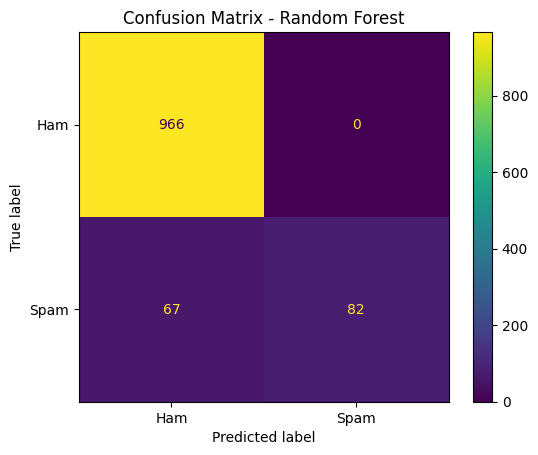

In [9]:
cm = confusion_matrix(y_test, y_pred_rf)
ConfusionMatrixDisplay(cm, display_labels=['Ham', 'Spam']).plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

## ROC Curve

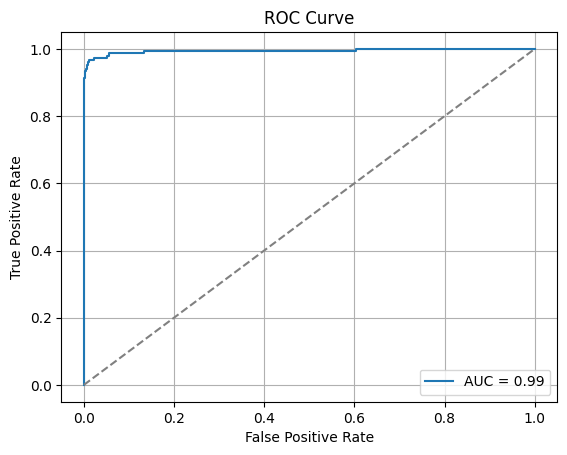

In [10]:
y_probs = rf.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()


## 📊 Model Evaluation – Beyond Accuracy

Accuracy isn't always the best measure (especially if your classes are imbalanced).

### 📦 Confusion Matrix

|                | Predicted Spam | Predicted Ham |
|----------------|----------------|---------------|
| **Actual Spam**| True Positive  | False Negative|
| **Actual Ham** | False Positive | True Negative |

From this matrix, we get:

- **Precision**:  
  $
  \text{Precision} = \frac{TP}{TP + FP}
  $
- **Recall**:  
  $
  \text{Recall} = \frac{TP}{TP + FN}
  $
- **F1 Score**:  
  $
  \text{F1} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $

---

### 📈 ROC Curve & AUC

- The ROC curve plots **True Positive Rate** (Recall) vs **False Positive Rate**
- **AUC** = Area under the ROC curve  
  A perfect model has AUC = 1.0, random guess = 0.5

$$
\text{AUC} = \int_{0}^{1} TPR(FPR) \, dFPR
$$

---

### 🔧 Tuning Tips

- `n_estimators`: Number of trees (more trees = better, but slower)
- `max_depth`: Limit depth to avoid overfitting
- `min_samples_leaf`: Minimum number of samples at leaf nodes (helps generalization)
- Feature importance: Random Forest tells you **which words** were most useful

---

### 🧠 TL;DR

| Model           | Strengths                       | Weaknesses                   |
|------------------|----------------------------------|-------------------------------|
| Decision Tree     | Easy to understand              | Overfits easily               |
| Random Forest     | Powerful and robust             | Slower, less interpretable    |
| Logistic Reg.     | Fast, good baseline             | Linear decision boundary only |

---

You’ve now learned **your first ensemble method** and how to **evaluate models properly**.  

# **SECTION 6: What’s Coming Next?**

### What’s Next in Week 6?
You’ve learned how Random Forests combine many decision trees to improve predictions.
But what if we could classify data by simply comparing it to the most **similar examples**?

➡️ Next week, we dive into **K-Nearest Neighbors (KNN)** — a simple but powerful approach that classifies based on proximity in feature space! 🏃‍♂️📍

### Exercises:
1. Try using `CountVectorizer` instead of `TfidfVectorizer`
2. Tune `n_estimators` and `max_depth` of the Random Forest
3. Try `min_samples_leaf=5` and see how it affects overfitting
4. Plot the top 10 most important features using `rf.feature_importances_`